## Content of the current notebook:
* Merging DataFrames with Pandas
* This notebook closely follows:
https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

In [1]:
# download function for a plot
!wget 'https://raw.githubusercontent.com/ReDI-School/python-data-science/master/redi/ws_18/utils/display.py'
from display import display_side_by_side as _display_side_by_side
display_side_by_side = _display_side_by_side(display)


Redirecting output to ‘wget-log.2’.


In [0]:
import pandas as pd

## Part 0: Intro to merge

In [3]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

display_side_by_side(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


#### Merge creates a single table out of two tables

Usually one collum in each table is used to connect the different rows. Here we use 'employee'.

In [4]:
df3 = pd.merge(df1, df2, on='employee')
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


#### Implicit detection of merge column

Pandas can implictly detect with column have the same name and merge on these. 
But is this really making the code easier to read?

In [5]:
display_side_by_side(pd.merge(df1, df2), pd.merge(df1, df2, on='employee'))

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


## Many-to-One
The Number of rows in both tables do not need to match. In the example below 'Engineering' is doublicated in the first table. In the second table the group column is unique. After merging on group we get as many rows as in the first table. Some data (the supervisior 'Guido' in this example) is doublicated.

In [6]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display_side_by_side(df3, df4, pd.merge(df3, df4, on='group'))

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


## Many-to-Many
It is also possible that there are doublicates in the column you merge on in both tables. The resulting table is then constructed from any combinations of the matching rows in both tables. 

In [7]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display_side_by_side(df1, df5, pd.merge(df1, df5, on='group'))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [8]:
display_side_by_side(
    df1[df1.group == 'Engineering'], 
    df5[df5.group == 'Engineering'], 
    pd.merge(df1[df1.group == 'Engineering'], df5[df5.group == 'Engineering'], on='group')
)

,employee,group
1,Jake,Engineering
2,Lisa,Engineering


,group,skills
2,Engineering,coding
3,Engineering,linux


,employee,group,skills
0,Jake,Engineering,coding
1,Jake,Engineering,linux
2,Lisa,Engineering,coding
3,Lisa,Engineering,linux


#### Question:
`In table 1 you have 100 different products with 100 entries each. In table 2 we have the same 100 products with 200 entries each. How big is the resulting table?`

## Part 1: A kind request for the BI Team
```
Dear BI Team, 
​
we are considering to open pop up stores in our main markets. Can you give me an overview of the number of customer we have in each city?
​
Thanks a lot!
```

In [9]:
# load the datasets
orders_url = 'https://raw.githubusercontent.com/ReDI-School/python-data-science/master/datasets/reseller2/orders.csv'
product_details_url = 'https://raw.githubusercontent.com/ReDI-School/python-data-science/master/datasets/reseller2/product_details.csv'
product_details_url = 'https://raw.githubusercontent.com/ReDI-School/python-data-science/a7dfe1203fe02a68026e8669db3dd04e7021fd9b/datasets/reseller2/product_details.csv'
shipping_details_url = 'https://raw.githubusercontent.com/ReDI-School/python-data-science/master/datasets/reseller2/shipping_details.csv'
orders = pd.read_csv(orders_url, parse_dates=['datetime_ordered'])
product_details = pd.read_csv(product_details_url)
shipping_details = pd.read_csv(shipping_details_url)

display_side_by_side(orders.head(), product_details.head(), shipping_details.head())

,order_id,product_id,purchase_price,sales_price,customer_id,used_promo_code,datetime_ordered
0,177,9493,89.0,119.99,325,True,2018-06-27 17:20:50
1,255,3771,31.0,49.99,436,False,2018-06-17 04:54:24
2,893,6902,3.5,4.49,532,True,2018-07-22 21:05:31
3,571,8141,6.0,13.99,86,False,2018-07-10 16:55:21
4,376,7787,5.4,13.99,125,True,2018-07-28 06:11:38


,p_id,product_name,product_brand
0,2448,T-shirt,Reebok
1,5425,Shoes,Adidas
2,1254,T-shirt,Jack Wolfskin
3,7787,T-shirt,Adidas
4,3617,Socks,Reebok


,order_id,shipping_location,datetime_shipped
0,904,Zürich,2018-07-02 08:31:27
1,119,Cologne,2018-07-15 01:25:24
2,193,Frankfurt,2018-07-12 11:22:16
3,237,Hamburg,2018-07-09 09:23:51
4,836,Munich,2018-06-29 09:16:11


In [0]:
# merge the table 'orders' and 'shipping_details'
orders_shipping_details = pd.merge(orders, shipping_details)

In [0]:
# count the number of customer per location - Tip: check nunique()
customer_per_location = orders_shipping_details.groupby('shipping_location')['customer_id'].nunique()

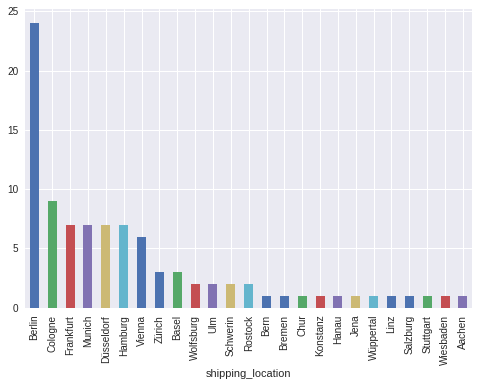

In [12]:
# plot the previous results
customer_per_location.sort_values(ascending=False).plot(kind='bar')

## Part 2: Another request for the BI Team
```
Dear BI Team, 
​
another urgent question. What are our 3 brands we generate most sales with? We really need to focus on our strengths!
​
You are my heros!
```

In [0]:
# merge the table 'orders' and 'product_details' (the product_is named differently in one of the tables)
orders_product_details = pd.merge(orders, product_details, left_on='product_id', right_on='p_id')

In [14]:
# answer the request above
orders_product_details.groupby('product_brand')['sales_price'].sum().sort_values(ascending=False)

product_brand
Jack Wolfskin    864.83
Adidas           745.76
Puma             725.76
Nike             518.93
Converse         359.92
Reebok           127.93
Lonsdale          10.50
Name: sales_price, dtype: float64

### Advanced
Can you visualize the total sales per city and product_name?. E.g. how many sales are of Nike in Berlin.

In [0]:
orders_details = pd.merge(orders_product_details, orders_shipping_details)

orders_details.groupby(['shipping_location', 'product_brand'])['sales_price'].sum()
loc_prod_sales = loc_prod_sales.reset_index()

In [0]:
loc_prod_sales['loc_prod'] = loc_prod_sales.product_brand + ' in ' + loc_prod_sales.shipping_location

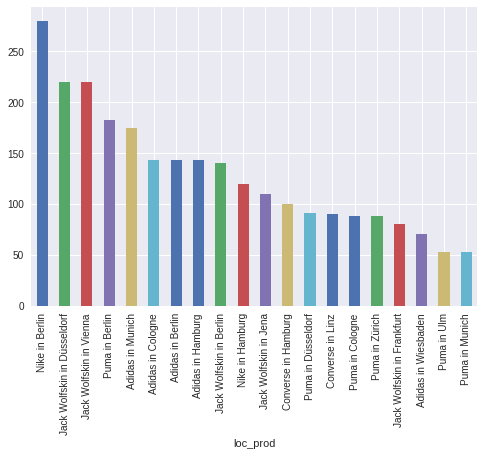

In [17]:
loc_prod_sales.set_index('loc_prod')['sales_price'].sort_values(ascending=False).head(20).plot(kind='bar')

# Part3: Inner, Outer, Left, Right Join
![alt text](https://www.dofactory.com/Images/sql-joins.png)

By default merge is doing an inner join. Try out what happens if you use an outer, left or right join.


In [18]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display_side_by_side(df6, df7)

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer


In [19]:
# by default merge is doing an 'inner' join
display_side_by_side(pd.merge(df6, df7), pd.merge(df6, df7, how='inner'))

,name,food,drink
0,Mary,bread,wine


,name,food,drink
0,Mary,bread,wine


In [20]:
# try out a outer, left and right join with the data above
display_side_by_side(pd.merge(df6, df7, how='left'), pd.merge(df6, df7, how='right'), pd.merge(df6, df7, how='outer'))

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [21]:
# Which join makes most 'sense' in this case from your perspective? Can you somehow fill the missing values?
pd.merge(df6, df7, how='outer').fillna('nothing')

,name,food,drink
0,Peter,fish,nothing
1,Paul,beans,nothing
2,Mary,bread,wine
3,Joseph,nothing,beer


### Advanced

Check if there is a difference in the results of part 1 and part 2 if you use a different type of join type (outer, left, right). Which one makes most sense? Is there missing data you might need to take into account?

When you suspect missing data in a real live situation, you should  try to estimate how much data might be missing and communicate this along your actual analysis.

In [0]:
orders_shipping_details_outer = pd.merge(orders, shipping_details, how='outer', on='order_id')
orders_details_outer = pd.merge(orders_shipping_details_outer, product_details, left_on='product_id', right_on='p_id', how='outer')

In [37]:
orders_details_outer.isnull().sum()

order_id              1
product_id           10
purchase_price       10
sales_price          10
customer_id          10
used_promo_code      10
datetime_ordered     10
shipping_location     1
datetime_shipped      1
p_id                 10
product_name         10
product_brand        10
dtype: int64

In [38]:
orders_details.isnull().sum()

order_id             0
product_id           0
purchase_price       0
sales_price          0
customer_id          0
used_promo_code      0
datetime_ordered     0
p_id                 0
product_name         0
product_brand        0
shipping_location    0
datetime_shipped     0
dtype: int64

In [39]:
orders_details_outer[orders_details_outer.isnull().any(1)]

,order_id,product_id,purchase_price,sales_price,customer_id,used_promo_code,datetime_ordered,shipping_location,datetime_shipped,p_id,product_name,product_brand
87,994.0,5157,33.0,49.99,2720.0,False,2018-07-07 19:29:39,Berlin,2018-07-09 18:23:04,NaN,NaN,NaN
95,119.0,NaN,NaN,NaN,NaN,NaN,NaT,Cologne,2018-07-15 01:25:24,NaN,NaN,NaN
96,354.0,NaN,NaN,NaN,NaN,NaN,NaT,Cologne,2018-06-06 23:35:10,NaN,NaN,NaN
97,572.0,NaN,NaN,NaN,NaN,NaN,NaT,Berlin,2018-06-10 12:57:42,NaN,NaN,NaN
98,612.0,NaN,NaN,NaN,NaN,NaN,NaT,Marburg,2018-08-02 03:00:51,NaN,NaN,NaN
99,361.0,NaN,NaN,NaN,NaN,NaN,NaT,Frankfurt,2018-07-30 21:10:28,NaN,NaN,NaN
100,911.0,NaN,NaN,NaN,NaN,NaN,NaT,Munich,2018-06-18 18:39:03,NaN,NaN,NaN
101,740.0,NaN,NaN,NaN,NaN,NaN,NaT,Frankfurt,2018-06-08 09:01:28,NaN,NaN,NaN
102,226.0,NaN,NaN,NaN,NaN,NaN,NaT,Zürich,2018-06-09 13:42:01,NaN,NaN,NaN
103,211.0,NaN,NaN,NaN,NaN,NaN,NaT,Wiesbaden,2018-06-05 00:15:28,NaN,NaN,NaN
